<a href="https://colab.research.google.com/github/Anjasfedo/Learning-TensorFlow/blob/main/eat_tensorflow2_in_30_days/Chapter5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-1 Dataset

All the data could be read into memory for training to maximize the efficiency, if the volume of training data is small (r.g. < 1gb).

However, if the data volume is huge (e.g. > 10gb) which is not possible to load everything into the memory, they should be devided into bathces before reading.

The API `tf.data` construct input data pipeline to help manage huge volume of data with various formats and coversions.

## 1. Constructuing Data Pipeline

Data pipeline could be constructed through followin methods:
- numpy array
- pandas DataFrame
- Python generator
- CSV file
- text file
- file path
- tfrecords file

Among these methods, the most popular ones are: numpy array, pandas DataFrame, and file path.

The drawback of using tfrecords file to construct data pipelines is its complication, since it requires:
- construct `tf.Example` from samples
- compress `tf.Example` into string and write it to tfrecords file
- when using these data, the tfrecords file have to be read and analyzed into `tf.Example`.

On the other hand, the advantage of using tfrecords files is its small volume after compression, its convenient sharing through the internet, and the fast speed of loading.

### 1.1 Constructuing Data Pipeline through Numpy Array

In [57]:
import tensorflow as tf
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

In [58]:
ds_1 = tf.data.Dataset.from_tensor_slices((iris['data'], iris['target']))

for features, label in ds_1.take(5):
    print(features, label)

tf.Tensor([5.1 3.5 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.9 3.  1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.7 3.2 1.3 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.6 3.1 1.5 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([5.  3.6 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)


### 1.2 Constructing Data Pipeline through Pandas Dataframe

In [59]:
import tensorflow as tf
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

In [60]:
df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
ds_2 = tf.data.Dataset.from_tensor_slices((df_iris.to_dict('list'), iris['target']))

for features, label in ds_2.take(5):
    print(features, label)

{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=5.1>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.5>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=4.9>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.0>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=4.7>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.2>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.3>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float

### 1.3 Constructing Data Pipeline through Python generator

In [61]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [62]:
# Download Dataset
!git clone https://github.com/lyhue1991/eat_tensorflow2_in_30_days

fatal: destination path 'eat_tensorflow2_in_30_days' already exists and is not an empty directory.


In [63]:
# Define generator to read image from a folder
image_generator = ImageDataGenerator(rescale=1/255).flow_from_directory(
                  '/content/eat_tensorflow2_in_30_days/data/cifar2/test',
                  target_size=(32, 32),
                  batch_size=20,
                  class_mode='binary'
                  )

Found 2000 images belonging to 2 classes.


In [64]:
class_indices = image_generator.class_indices
print(class_indices)

{'airplane': 0, 'automobile': 1}


In [65]:
def generator():
  for features, label in image_generator:
    yield (features, label)

In [66]:
ds_3 = tf.data.Dataset.from_generator(generator, output_types=(tf.float32, tf.int32))

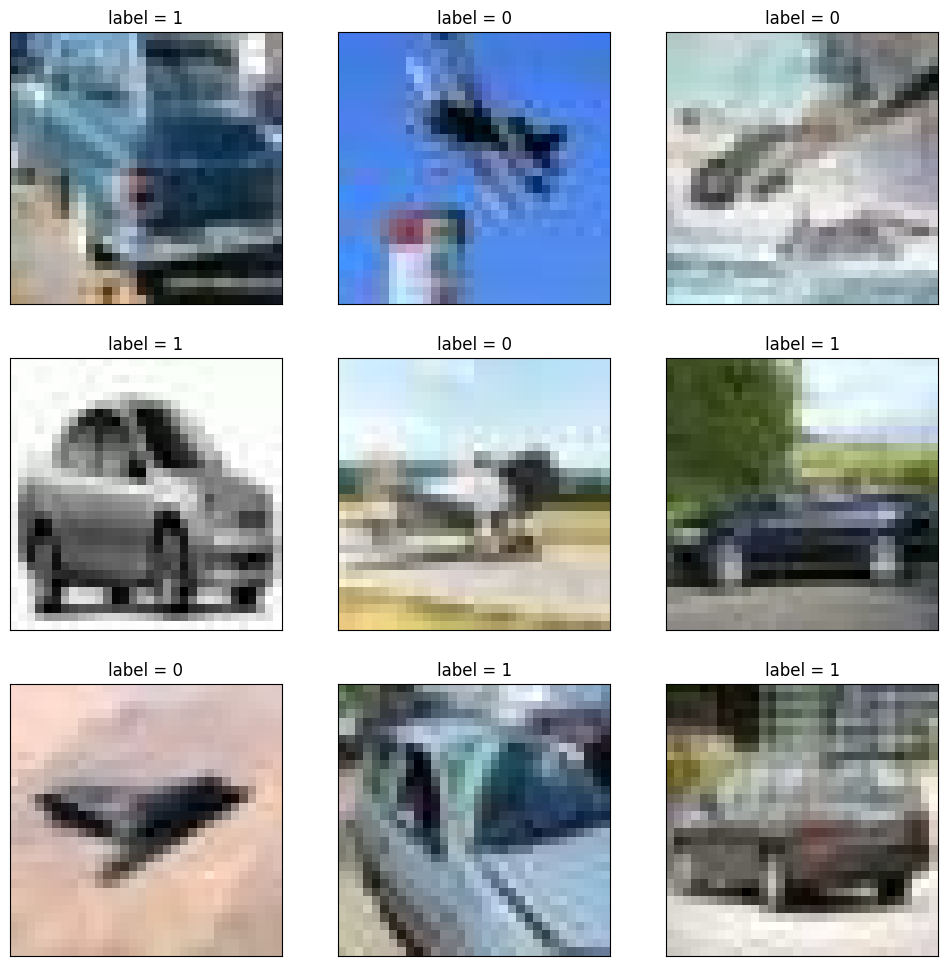

In [67]:
plt.figure(figsize=(12, 12))
for i, (img, label) in enumerate(ds_3.unbatch().take(9)):
    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(img.numpy())
    ax.set_title("label = %d" % label)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

### 1.4 Constructing Data Pipeline through CSV file

In [68]:
ds_4 = tf.data.experimental.make_csv_dataset(
    file_pattern=['/content/eat_tensorflow2_in_30_days/data/titanic/train.csv', '/content/eat_tensorflow2_in_30_days/data/titanic/test.csv'],
    batch_size=3,
    label_name='Survived',
    na_value='',
    num_epochs=1,
    ignore_errors=True
)

In [69]:
for data, label in ds_4.take(2):
    print(data, label)

OrderedDict([('PassengerId', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([183, 548, 450], dtype=int32)>), ('Pclass', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 2, 1], dtype=int32)>), ('Name', <tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'Asplund, Master. Clarence Gustaf Hugo',
       b'Padro y Manent, Mr. Julian', b'Peuchen, Major. Arthur Godfrey'],
      dtype=object)>), ('Sex', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'male', b'male', b'male'], dtype=object)>), ('Age', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 9.,  0., 52.], dtype=float32)>), ('SibSp', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 0, 0], dtype=int32)>), ('Parch', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 0, 0], dtype=int32)>), ('Ticket', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'347077', b'SC/PARIS 2146', b'113786'], dtype=object)>), ('Fare', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([31.3875, 13.8625, 30.5   ], dtype=float32)>), ('Cab

### 1.5 Constructing Data Pipeline through text file

In [70]:
ds_5 = tf.data.TextLineDataset(filenames=['/content/eat_tensorflow2_in_30_days/data/titanic/train.csv', '/content/eat_tensorflow2_in_30_days/data/titanic/test.csv']) \
        .skip(1) # ommiting the header on the first lane

In [71]:
for line in ds_5.take(2):
  print(line)

tf.Tensor(b'493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S', shape=(), dtype=string)
tf.Tensor(b'53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C', shape=(), dtype=string)


### 1.6 Constructing Data Pipeline through file path

In [72]:
ds_6 = tf.data.Dataset.list_files('/content/eat_tensorflow2_in_30_days/data/cifar2/train/*/*.jpg')

In [73]:
for file in ds_6.take(2):
  print(file)

tf.Tensor(b'/content/eat_tensorflow2_in_30_days/data/cifar2/train/automobile/2428.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/eat_tensorflow2_in_30_days/data/cifar2/train/automobile/209.jpg', shape=(), dtype=string)


In [74]:
def load_image(img_path, size=(32, 32)):
  label = 1 if tf.strings.regex_full_match(img_path, '.*automobile.*') else 0
  img = tf.io.read_file(img_path)
  img = tf.image.decode_jpeg(img) # to jpeg format
  img = tf.image.resize(img, size)
  return (img, label)

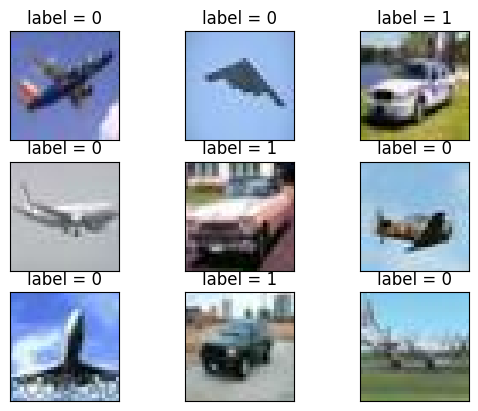

In [75]:
from matplotlib import pyplot as plt

for i, (img, label) in enumerate(ds_6.map(load_image).take(9)):
  ax = plt.subplot(3, 3, i + 1)
  ax.imshow((img/255.0).numpy())
  ax.set_title("label = %d" % label)
  ax.set_xticks([])
  ax.set_yticks([])

## 1.7 Constructing Data Pipeline through tfrecords file

In [76]:
import os
import numpy as np

# Inpath is the original data path
# Outpath is output path of the TFRecord file
def create_tfrecords(inpath,outpath):
  writer = tf.io.TFRecordWriter(outpath)
  dirs = os.listdir(inpath)
  for index, name in enumerate(dirs):
      class_path = inpath + '/' + name+ '/'
      for img_name in os.listdir(class_path):
          img_path = class_path + img_name
          img = tf.io.read_file(img_path)
          #img = tf.image.decode_image(img)
          #img = tf.image.encode_jpeg(img) # Use jpeg format for all the compressions
          example = tf.train.Example(
             features=tf.train.Features(feature={
                  'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[index])),
                  'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img.numpy()]))
             }))
          writer.write(example.SerializeToString())
  writer.close()

create_tfrecords('/content/eat_tensorflow2_in_30_days/data/cifar2/test', '/content/cifar2_test.tfrecords/')

In [77]:
def parse_example(proto):
  description = {
      'label': tf.io.FixedLenFeature([], tf.int64),
      'img_raw': tf.io.FixedLenFeature([], tf.string)
  }

  example = tf.io.parse_single_example(proto, description)
  img = tf.image.decode_jpeg(example['img_raw']) # jpeg format
  img = tf.image.resize(img, [32, 32])
  label = example['label']

  return (img, label)

In [78]:
ds_7 = tf.data.TFRecordDataset('/content/cifar2_test.tfrecords') \
        .map(parse_example) \
        .shuffle(buffer_size=3000)

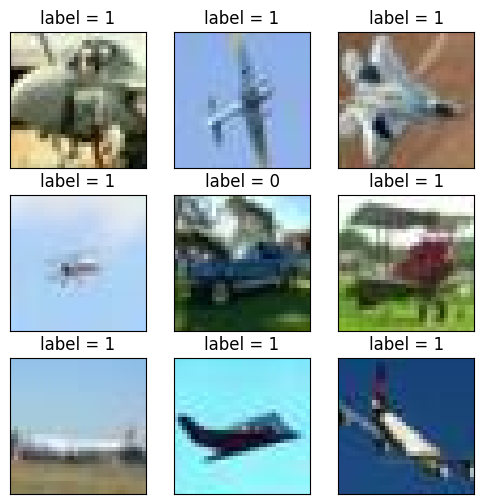

In [79]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6, 6))
for i,(img,label) in enumerate(ds_7.take(9)):
  ax=plt.subplot(3, 3, i + 1)
  ax.imshow((img/255.0).numpy())
  ax.set_title("label = %d"%label)
  ax.set_xticks([])
  ax.set_yticks([])
plt.show()

## 2. Applying Data Conversion

Dataset is very flexible in the application of data structure. Essentially it is a sequence with elements in various data types, such as tensor, list, dictionary, and Dataset.

Dataset contains many functions of data conversion.
- `map`: projecting the conversion function to every element in the dataset.
- `file_map`: projecting the conversion function to every element in the dataset, and flatten the embedded Dataset.
- `interleave`: similar as `flat_map` but the interlaves the data from different sources.
- `filter`: filter certain elements.
- `zip`: zipping two Datasets with the same length.
- `concatenate`: concatenating two Datasets.
- `reduce`: executing operation of reducing.
- `batch`: constructing bathces and release on batch each time; there will be one more rank comparing to the original data; the inverse operation is `unbatch`.
- `padded_batch`: constructing bathces, similar as `batch`, but can achieve padded shape.
- `window`: constructing sliding window, and return Dataset of Dataset.
- `shuffle`: shuffling the order of the data.
- `repeat`: repeat the data certain times; if no argument is specified, repeat data with infinite times.
- `shard`: sampling the elements starting from as certain position with fixed distance.
- `take`: sampling the first few elements from certain position.

In [80]:
#  map
ds = tf.data.Dataset.from_tensor_slices(['hello lorem', 'world ipsum', 'dolor res'])
ds_map = ds.map(lambda x: tf.strings.split(x, ' '))
for x in ds_map:
  print(x)

tf.Tensor([b'hello' b'lorem'], shape=(2,), dtype=string)
tf.Tensor([b'world' b'ipsum'], shape=(2,), dtype=string)
tf.Tensor([b'dolor' b'res'], shape=(2,), dtype=string)


In [81]:
# flat_map
ds = tf.data.Dataset.from_tensor_slices(['hello lorem', 'world ipsum', 'dolor res'])
ds_flat_map = ds.flat_map(lambda x: tf.data.Dataset.from_tensor_slices(tf.strings.split(x, ' ')))

for x in ds_flat_map:
  print(x)

tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'lorem', shape=(), dtype=string)
tf.Tensor(b'world', shape=(), dtype=string)
tf.Tensor(b'ipsum', shape=(), dtype=string)
tf.Tensor(b'dolor', shape=(), dtype=string)
tf.Tensor(b'res', shape=(), dtype=string)


In [82]:
# interleave
ds = tf.data.Dataset.from_tensor_slices(['hello lorem', 'world ipsum', 'dolor res'])
ds_interleave = ds.interleave(lambda x: tf.data.Dataset.from_tensor_slices(tf.strings.split(x, ' ')))

for x in ds_interleave:
  print(x)

tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'world', shape=(), dtype=string)
tf.Tensor(b'lorem', shape=(), dtype=string)
tf.Tensor(b'ipsum', shape=(), dtype=string)
tf.Tensor(b'dolor', shape=(), dtype=string)
tf.Tensor(b'res', shape=(), dtype=string)


In [83]:
# filter
ds = tf.data.Dataset.from_tensor_slices(['hello lorem', 'world ipsum', 'dolor res'])
ds_filter = ds.filter(lambda x: tf.strings.length(x) > 10)

for x in ds_filter:
  print(x)

tf.Tensor(b'hello lorem', shape=(), dtype=string)
tf.Tensor(b'world ipsum', shape=(), dtype=string)


In [87]:
# zip
ds1 = tf.data.Dataset.range(0,3)
ds2 = tf.data.Dataset.range(3,6)
ds3 = tf.data.Dataset.range(6,9)
ds_zip = tf.data.Dataset.zip((ds1, ds2, ds3))

for x,y,z in ds_zip:
    print(x.numpy(),y.numpy(),z.numpy())

0 3 6
1 4 7
2 5 8


In [88]:
# concatenate
ds_1 = tf.data.Dataset.range(0, 3)
ds_2 = tf.data.Dataset.range(3, 6)
ds_concat = tf.data.Dataset.concatenate(ds_1, ds_2)

for x in ds_concat:
  print(x.numpy())

0
1
2
3
4
5


In [91]:
# reduce
ds = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5.0])
ds_reduce = ds.reduce(0.0, lambda state, value: tf.add(state, value))

print(ds_reduce)

tf.Tensor(15.0, shape=(), dtype=float32)


In [93]:
# batch
ds = tf.data.Dataset.range(8)
ds_batch = ds.batch(3)

for x in ds_batch:
  print(x)

tf.Tensor([0 1 2], shape=(3,), dtype=int64)
tf.Tensor([3 4 5], shape=(3,), dtype=int64)
tf.Tensor([6 7], shape=(2,), dtype=int64)


In [96]:
# padded_batch
elements = [[1, 2], [3, 4, 5], [6, 7], [8]]
ds = tf.data.Dataset.from_generator(lambda: iter(elements), tf.int64)
ds_padded_batch = ds.padded_batch(2, padded_shapes=(4,))

for x in ds_padded_batch:
  print(x)

tf.Tensor(
[[1 2 0 0]
 [3 4 5 0]], shape=(2, 4), dtype=int64)
tf.Tensor(
[[6 7 0 0]
 [8 0 0 0]], shape=(2, 4), dtype=int64)


In [99]:
# window
ds = tf.data.Dataset.range(8)
# window returns Dataset of Datase, which could be flattened by flat_map
ds_window = ds.window(3, shift=1).flat_map(lambda x: x.batch(3, drop_remainder=True))

for x in ds_window:
  print(x)

tf.Tensor([0 1 2], shape=(3,), dtype=int64)
tf.Tensor([1 2 3], shape=(3,), dtype=int64)
tf.Tensor([2 3 4], shape=(3,), dtype=int64)
tf.Tensor([3 4 5], shape=(3,), dtype=int64)
tf.Tensor([4 5 6], shape=(3,), dtype=int64)
tf.Tensor([5 6 7], shape=(3,), dtype=int64)


In [102]:
# shuffle
ds = tf.data.Dataset.range(8)
ds_shuffle = ds.shuffle(5)

for x in ds_shuffle:
  print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)


In [103]:
# repeat
ds = tf.data.Dataset.range(3)
ds_repeat = ds.repeat(count=2)

for x in ds_repeat:
  print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)


In [104]:
# shard
ds = tf.data.Dataset.range(8)
ds_shard = ds.shard(num_shards=2, index=0)

for x in ds_shard:
  print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)


In [105]:
# take
ds = tf.data.Dataset.range(8)
ds_take = ds.take(4)

for x in ds_take:
  print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)


## 3. Enhance the Efficiency of the Pipeline

The training of deep learing model could be lengthy.

The consumed time is mainly consists of two parts:
- data preparation
- parameter iteration

The efficiency of parameter iteration is usually enhanced by GPU.

The efficiency of data preparation could be improved by constructing high-efficiency data pipeline.

Here several way to constructing high-efficiency data pipeline:
- 1. Paralleling the data preparation and the parameter iteration using method `prefetch`.
- 2. Use the method `interleave` to read data with multi-process and interleave the data from different sources.
- 3. Set `num_parallel_calls` during using `map`, allowing data conversion with multiple process.
- 4. Apply method `cache` to cache data into the memory after the first epoch for the case with a small data volume.
- 5. When converting with `map`, batch the data first, and then convert each batch with vectorization

### 3.1 Paralleling the data preparation and the parameter iteration using method `prefetch`.

In [106]:
import tensorflow as tf

# Time stamp
@tf.function
def printbar():
  ts = tf.timestamp()
  today_ts = ts%(24*60*60)

  hour = tf.cast(today_ts//3600+8,tf.int32)%tf.constant(24)
  minute = tf.cast((today_ts%3600)//60,tf.int32)
  second = tf.cast(tf.floor(today_ts%60),tf.int32)

  def timeformat(m):
    if tf.strings.length(tf.strings.format("{}", m)) == 1:
      return(tf.strings.format("0{}", m))
    else:
      return(tf.strings.format("{}", m))

  timestring = tf.strings.join([timeformat(hour), timeformat(minute),
                                timeformat(second)], separator = ":")

  tf.print("=========="*8,end = "")
  tf.print(timestring)

In [107]:
import time

# Data preparation adn parameter is serial as default

# Simulation of data preparation
def generator():
  for i in range(10):
    time.sleep(2) # need 2 seconds for each preparation
    yield i

In [109]:
ds = tf.data.Dataset.from_generator(generator, output_types=tf.float32)

In [112]:
# Simulation of parameter iteration
def train_step():
  time.sleep(1) # need 1 second for each parameter iteration

In [113]:
# Estimated time for training: 10*2+10*1 = 30s
printbar()
tf.print(tf.constant('start training'))

for x in ds:
  train_step()
printbar()
tf.print(tf.constant('end training'))

================================================================================11:30:05
start training
================================================================================11:30:26
end training


In [114]:
# Use method prefetch to parallel the processes of data preparation and parameter iteration

# Estimated time of training: max(10*2, 10*1) = 20s
printbar()
tf.print(tf.constant('start training with prefetch'))

# tf.data.experimental.AUTOTUNE allows auto-selection of parameters
for x in ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE):
  train_step()

printbar()
tf.print(tf.constant('end training with prefetch'))

================================================================================11:32:32
start training with prefetch
================================================================================11:32:53
end training with prefetch


### 3.2 Use the method `interleave` to read data with multi-process and interleave the data from different sources.

In [115]:
ds_files = tf.data.Dataset.list_files('/content/eat_tensorflow2_in_30_days/data/titanic/*.csv')
ds = ds_files.flat_map(lambda x: tf.data.TextLineDataset(x).skip(1))

for line in ds.take(5):
  print(line)

tf.Tensor(b'181,0,3,"Sage, Miss. Constance Gladys",female,,8,2,CA. 2343,69.55,,S', shape=(), dtype=string)
tf.Tensor(b'405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,,S', shape=(), dtype=string)
tf.Tensor(b'635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,,S', shape=(), dtype=string)
tf.Tensor(b'701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C', shape=(), dtype=string)
tf.Tensor(b'470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,,C', shape=(), dtype=string)


In [116]:
ds_files = tf.data.Dataset.list_files('/content/eat_tensorflow2_in_30_days/data/titanic/*.csv')
ds = ds_files.interleave(lambda x: tf.data.TextLineDataset(x).skip(1))

for line in ds.take(5):
  print(line)

tf.Tensor(b'181,0,3,"Sage, Miss. Constance Gladys",female,,8,2,CA. 2343,69.55,,S', shape=(), dtype=string)
tf.Tensor(b'493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S', shape=(), dtype=string)
tf.Tensor(b'405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,,S', shape=(), dtype=string)
tf.Tensor(b'53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C', shape=(), dtype=string)
tf.Tensor(b'635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,,S', shape=(), dtype=string)


### 3.3 Set `num_parallel_calls` during using `map`, allosing data conversion with multiple process

In [118]:
ds = tf.data.Dataset.list_files('/content/eat_tensorflow2_in_30_days/data/cifar2/train/*/*.jpg')

In [119]:
def load_image(img_path, size=(32, 32)):
  label = 1 if tf.strings.regex_full_match(img_path, '.*automobile.*') else 0
  img = tf.io.read_file(img_path)
  img = tf.image.decode_jpeg(img) # to jpeg format
  img = tf.image.resize(img, size)
  return (img, label)

In [120]:
# Conversion with single process
printbar()
tf.print(tf.constant('start transformation'))

ds_map = ds.map(load_image)

for _ in ds_map:
  pass

printbar()
tf.print(tf.constant('end transformation'))

================================================================================11:57:18
start transformation
================================================================================11:57:27
end transformation


In [121]:
# Conversion with multi-process
printbar()
tf.print(tf.constant('start transformation with multi-process'))

ds_map = ds.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

for _ in ds_map:
  pass

printbar()
tf.print(tf.constant('end transformation with multi-process'))

================================================================================11:57:50
start transformation with multi-process
================================================================================11:57:57
end transformation with multi-process


### 3.4 Apply method `cache` to cache data into the memory after the first epoch for the case with a small data volume.

In [122]:
import time

# Simulation of data preparation
def generator():
  for i in range(5):
    time.sleep(2) # need 2 seconds for each preparation
    yield i

In [123]:
ds = tf.data.Dataset.from_generator(generator, output_types=tf.float32)

In [124]:
# Simulation of parameter iteration
def train_step():
  time.sleep(1) # need 1 second for each parameter iteration

In [125]:
# Estimated time for training: (5*2+5*0)*3 = 30s
printbar()
tf.print(tf.constant('start training'))

for epoch in tf.range(3):
  for x in ds:
    train_step()

  printbar()
  tf.print(tf.constant('epoch:'), epoch)

printbar()
tf.print(tf.constant('end training'))

================================================================================12:00:35
start training
================================================================================12:00:46
"epoch:" 0
================================================================================12:00:57
"epoch:" 1
================================================================================12:01:08
"epoch:" 2
================================================================================12:01:08
end training


In [79]:
ds.cache()

In [126]:
# Estimated time for training: (5*2+5*0)+(5*0+5*0)*2 = 10s
printbar()
tf.print(tf.constant('start training with cache'))

for epoch in tf.range(3):
  for x in ds:
    train_step()

  printbar()
  tf.print(tf.constant('epoch:'), epoch)

printbar()
tf.print(tf.constant('end training with cache'))

================================================================================12:01:32
start training with cache
================================================================================12:01:43
"epoch:" 0
================================================================================12:01:54
"epoch:" 1
================================================================================12:02:05
"epoch:" 2
================================================================================12:02:05
end training with cache


### 3.5 When converting with `map`, batch the data first, and then convert each batch with vectorization.

In [127]:
# map first, then batch
ds = tf.data.Dataset.range(100000)
ds_map_batch = ds.map(lambda x:x**2).batch(20)

In [128]:
printbar()
tf.print(tf.constant('start scalar transformation'))

for _ in ds_map_batch:
  pass

printbar()
tf.print(tf.constant('end scalar transformation'))

================================================================================12:05:11
start scalar transformation
================================================================================12:05:13
end scalar transformation


In [129]:
# batch first, then map
ds = tf.data.Dataset.range(100000)
ds_batch_map = ds.batch(20).map(lambda x:x**2)

In [130]:
printbar()
tf.print(tf.constant('start scalar transformation'))

for _ in ds_batch_map:
  pass

printbar()
tf.print(tf.constant('end scalar transformation'))

================================================================================12:05:36
start scalar transformation
================================================================================12:05:37
end scalar transformation
